## Importing Data

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import boxcox
import seaborn as sns
import os

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Reading the dataset

There are 3 datasets present. They need to be joined by a common attribute.

-	Borrower Information: Information on the clients’ customers
-	Loan Classification Information: Information on the loan itself
-	Loan Payment Information: Information on the payments on the loans.

Between Borrower and Loan Datasets, the common attribute is "member_id" whereas between Loan and Payment Datasets, the common attribute is "id"

In [98]:
##Reading the dataset
df_borrower = pd.read_csv('C:/Users/sarita.machado/OneDrive - Accenture/Sarita_BEL/myLearning/Projects/Assessment Test/OneDrive_2019-07-04/To be communicated to the candidate/Borrower Information.csv')
df_borrower.head(3)

,Unnamed: 0,member_id,emp_title,emp_length,home_ownership,zip_code,addr_state,annual_inc,annual_inc_joint,open_acc,pub_rec,total_acc,delinq_2yrs,earliest_cr_line
0,1,1296599,NaN,10+ years,RENT,860xx,AZ,24000.0,NaN,3.0,0.0,9.0,0.0,Jan-1985
1,2,1314167,Ryder,< 1 year,RENT,309xx,GA,30000.0,NaN,3.0,0.0,4.0,0.0,Apr-1999
2,3,1313524,NaN,10+ years,RENT,606xx,IL,12252.0,NaN,2.0,0.0,10.0,0.0,Nov-2001


In [99]:
df_loan = pd.read_csv('C:/Users/sarita.machado/OneDrive - Accenture/Sarita_BEL/myLearning/Projects/Assessment Test/OneDrive_2019-07-04/To be communicated to the candidate/Loan Classification Information.csv')
df_loan.head(3)

C:\Users\sarita.machado\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,member_id,term,grade,sub_grade,loan_status,pymnt_plan,purpose,application_type,issue_d,desc,title,loan_amnt,int_rate,funded_amnt,funded_amnt_inv,installment
0,1,1077501,1296599,36 months,B,B2,Fully Paid,n,credit_card,INDIVIDUAL,Dec-2011,Borrower added on 12/22/11 > I need to upgra...,Computer,5000,10.65,5000,4975.0,162.87
1,2,1077430,1314167,60 months,C,C4,Charged Off,n,car,INDIVIDUAL,Dec-2011,Borrower added on 12/22/11 > I plan to use t...,bike,2500,15.27,2500,2500.0,59.83
2,3,1077175,1313524,36 months,C,C5,Fully Paid,n,small_business,INDIVIDUAL,Dec-2011,NaN,real estate business,2400,15.96,2400,2400.0,84.33


In [100]:
df_pay = pd.read_csv('C:/Users/sarita.machado/OneDrive - Accenture/Sarita_BEL/myLearning/Projects/Assessment Test/OneDrive_2019-07-04/To be communicated to the candidate/Loan Payment Information.csv')
df_pay.head(3)

,Unnamed: 0,id,dti,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,revol_bal,revol_util,out_prncp,out_prncp_inv,...,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m
0,1,1077501,27.65,1.0,NaN,NaN,13648.0,83.7,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1077430,1.00,5.0,NaN,NaN,1687.0,9.4,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1077175,8.72,2.0,NaN,NaN,2956.0,98.5,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# Joining Borrower and Loan Datasets on "member_id"
df_inter=pd.merge(df_loan,df_borrower, on="member_id")

In [102]:
df_inter.head(3)

,Unnamed: 0_x,id,member_id,term,grade,sub_grade,loan_status,pymnt_plan,purpose,application_type,...,home_ownership,zip_code,addr_state,annual_inc,annual_inc_joint,open_acc,pub_rec,total_acc,delinq_2yrs,earliest_cr_line
0,1,1077501,1296599,36 months,B,B2,Fully Paid,n,credit_card,INDIVIDUAL,...,RENT,860xx,AZ,24000.0,NaN,3.0,0.0,9.0,0.0,Jan-1985
1,2,1077430,1314167,60 months,C,C4,Charged Off,n,car,INDIVIDUAL,...,RENT,309xx,GA,30000.0,NaN,3.0,0.0,4.0,0.0,Apr-1999
2,3,1077175,1313524,36 months,C,C5,Fully Paid,n,small_business,INDIVIDUAL,...,RENT,606xx,IL,12252.0,NaN,2.0,0.0,10.0,0.0,Nov-2001


In [103]:
# Joining Intermediate DataSet and Payment Datasets on "id"
df=pd.merge(df_inter,df_pay, on="id")

In [104]:
df_pay.head(3)

,Unnamed: 0,id,dti,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,revol_bal,revol_util,out_prncp,out_prncp_inv,...,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m
0,1,1077501,27.65,1.0,NaN,NaN,13648.0,83.7,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1077430,1.00,5.0,NaN,NaN,1687.0,9.4,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1077175,8.72,2.0,NaN,NaN,2956.0,98.5,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df.head(3)

,Unnamed: 0_x,id,member_id,term,grade,sub_grade,loan_status,pymnt_plan,purpose,application_type,...,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m
0,1,1077501,1296599,36 months,B,B2,Fully Paid,n,credit_card,INDIVIDUAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1077430,1314167,60 months,C,C4,Charged Off,n,car,INDIVIDUAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1077175,1313524,36 months,C,C5,Fully Paid,n,small_business,INDIVIDUAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking the Size of the Merged Data set

In [106]:
df.shape

(887379, 71)

####  Looking for Columns and their % of null data

In [107]:
pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})

,Count,Percent
Unnamed: 0_x,0,0.000000
id,0,0.000000
member_id,0,0.000000
term,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000
loan_status,0,0.000000
pymnt_plan,0,0.000000
purpose,0,0.000000
application_type,0,0.000000


In [108]:
df.shape

(887379, 71)

If you take a look, there are atleast 15 columns who have more than 80% of their data as 'NA'. Hence we can drop these rows

In [109]:
df = df.dropna(axis=1, thresh=int(0.80*len(df)))

#### Dropping Duplicates 

In [110]:
df.drop_duplicates(keep='first',inplace=True)

### Looking to drop columns which intuitively wont add value to the prediction

In [111]:
df.head(3)

,Unnamed: 0_x,id,member_id,term,grade,sub_grade,loan_status,pymnt_plan,purpose,application_type,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,1,1077501,1296599,36 months,B,B2,Fully Paid,n,credit_card,INDIVIDUAL,...,0.0,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,0.0,NaN,NaN
1,2,1077430,1314167,60 months,C,C4,Charged Off,n,car,INDIVIDUAL,...,0.0,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,0.0,NaN,NaN
2,3,1077175,1313524,36 months,C,C5,Fully Paid,n,small_business,INDIVIDUAL,...,0.0,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,0.0,NaN,NaN


In [112]:
"""
df['grade']=df.grade.astype('category').cat.codes
df['sub_grade']=df.sub_grade.astype('category').cat.codes
df['pymnt_plan']=df.pymnt_plan.astype('category').cat.codes
df['purpose']=df.purpose.astype('category').cat.codes
df['application_type']=df.application_type.astype('category').cat.codes
df['issue_d']=df.issue_d.astype('category').cat.codes
df['title']=df.title.astype('category').cat.codes
df['emp_length']=df.emp_length.astype('category').cat.codes
df['term']=df.term.astype('category').cat.codes
df['home_ownership']=df.home_ownership.astype('category').cat.codes
df.head(3)
"""

"\ndf['grade']=df.grade.astype('category').cat.codes\ndf['sub_grade']=df.sub_grade.astype('category').cat.codes\ndf['pymnt_plan']=df.pymnt_plan.astype('category').cat.codes\ndf['purpose']=df.purpose.astype('category').cat.codes\ndf['application_type']=df.application_type.astype('category').cat.codes\ndf['issue_d']=df.issue_d.astype('category').cat.codes\ndf['title']=df.title.astype('category').cat.codes\ndf['emp_length']=df.emp_length.astype('category').cat.codes\ndf['term']=df.term.astype('category').cat.codes\ndf['home_ownership']=df.home_ownership.astype('category').cat.codes\ndf.head(3)\n"

In [113]:
df_numerical = df.select_dtypes(include ={'float64','int64'}) 
df_numerical.describe()

,Unnamed: 0_x,id,member_id,loan_amnt,int_rate,funded_amnt,funded_amnt_inv,installment,Unnamed: 0_y,annual_inc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal
count,887379.000000,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,...,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,887350.000000,8.171030e+05,8.171030e+05
mean,443690.000000,3.246513e+07,3.500182e+07,14755.264605,13.246740,14741.877625,14702.464383,436.717127,443690.000000,7.502759e+04,...,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,0.004991,2.257026e+02,1.394582e+05
std,256164.396598,2.282734e+07,2.411335e+07,8435.455601,4.381867,8429.897657,8442.106732,244.186593,256164.396598,6.469830e+04,...,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,0.077625,1.031137e+04,1.537500e+05
min,1.000000,5.473400e+04,7.047300e+04,500.000000,5.320000,500.000000,0.000000,15.670000,1.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,221845.500000,9.206643e+06,1.087713e+07,8000.000000,9.990000,8000.000000,8000.000000,260.705000,221845.500000,4.500000e+04,...,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,0.000000,0.000000e+00,2.985300e+04
50%,443690.000000,3.443327e+07,3.709528e+07,13000.000000,12.990000,13000.000000,13000.000000,382.550000,443690.000000,6.500000e+04,...,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,0.000000,0.000000e+00,8.055900e+04
75%,665534.500000,5.490814e+07,5.847135e+07,20000.000000,16.200000,20000.000000,20000.000000,572.600000,665534.500000,9.000000e+04,...,8000.000000,2238.265000,0.000000,0.000000,0.000000,831.245000,0.000000,0.000000,0.000000e+00,2.082050e+05
max,887379.000000,6.861706e+07,7.354484e+07,35000.000000,28.990000,35000.000000,35000.000000,1445.460000,887379.000000,9.500000e+06,...,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36475.590000,20.000000,14.000000,9.152545e+06,8.000078e+06


We try to remove features which are highly corelated. Variables which are highly correlated should be removed as they disturb in the process of creating predictive models. Here we remove variables that have correlation of 0.65 and above

In [114]:

# Create correlation matrix
corr_matrix = df_numerical.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.65)]
df.drop(df_numerical[to_drop], axis=1, inplace=True )

In [115]:
df.shape

(887379, 35)

In [116]:
df.dtypes

Unnamed: 0_x                    int64
term                           object
grade                          object
sub_grade                      object
loan_status                    object
pymnt_plan                     object
purpose                        object
application_type               object
issue_d                        object
title                          object
loan_amnt                       int64
int_rate                      float64
emp_title                      object
emp_length                     object
home_ownership                 object
zip_code                       object
addr_state                     object
annual_inc                    float64
open_acc                      float64
pub_rec                       float64
delinq_2yrs                   float64
earliest_cr_line               object
dti                           float64
inq_last_6mths                float64
revol_bal                     float64
revol_util                    float64
total_pymnt 

We remove the columns which wont add much information to our predictive modeling

In [117]:
df.drop(['Unnamed: 0_x','zip_code','emp_title','addr_state','earliest_cr_line','issue_d','purpose','collections_12_mths_ex_med','last_credit_pull_d','last_pymnt_d','earliest_cr_line','sub_grade','title','pymnt_plan','application_type'],axis=1,inplace=True)

Removing the word "months" from the data

In [118]:
df['term'] = [x[:2] for x in df['term']]
df['term'] = pd.to_numeric(df['term'],errors='coerce')

Removing the word "years" from the column data

In [119]:
df.shape
df['emp_length'] = df['emp_length'].replace({'10 years':'10'})
df['emp_length'] = df['emp_length'].replace({'1 year':'1'})
df['emp_length'] = df['emp_length'].replace({'2 years':'2'})
df['emp_length'] = df['emp_length'].replace({'3 years':'3'})
df['emp_length'] = df['emp_length'].replace({'4 years':'4'})
df['emp_length'] = df['emp_length'].replace({'5 years':'5'})
df['emp_length'] = df['emp_length'].replace({'6 years':'6'})
df['emp_length'] = df['emp_length'].replace({'7 years':'7'})
df['emp_length'] = df['emp_length'].replace({'8 years':'8'})
df['emp_length'] = df['emp_length'].replace({'9 years':'9'})
#df['emp_length'] = [x[:2] for x in df['emp_length']]
df.emp_length.value_counts()

10+ years    291569
2             78870
< 1 year      70605
3             70026
1             57095
5             55704
4             52529
7             44594
8             43955
6             42950
9             34657
Name: emp_length, dtype: int64

In [120]:
df['emp_length'] = pd.to_numeric(df['emp_length'],errors='coerce')
df.emp_length.value_counts()

2.0    78870
3.0    70026
1.0    57095
5.0    55704
4.0    52529
7.0    44594
8.0    43955
6.0    42950
9.0    34657
Name: emp_length, dtype: int64

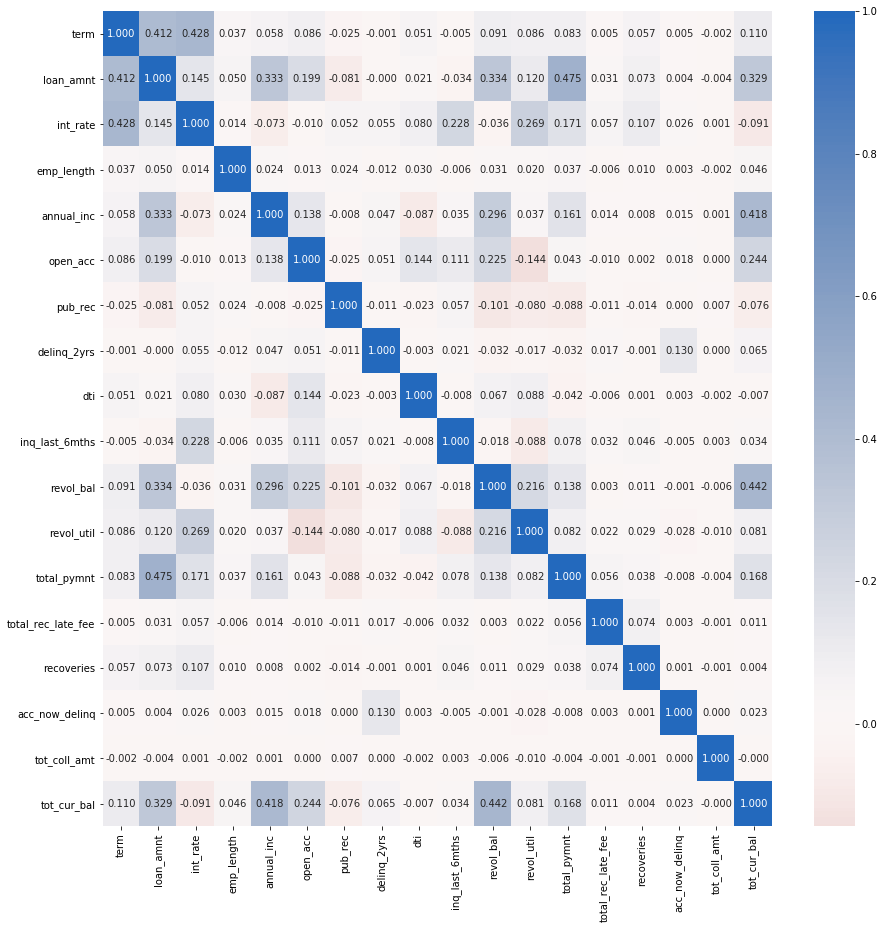

In [121]:
plt.figure(figsize = [15, 15])
sns.heatmap(df.corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

Hence we remove variables that are highly co-related to each other amnf categorical variables

## Distribution of Loan Value Status

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

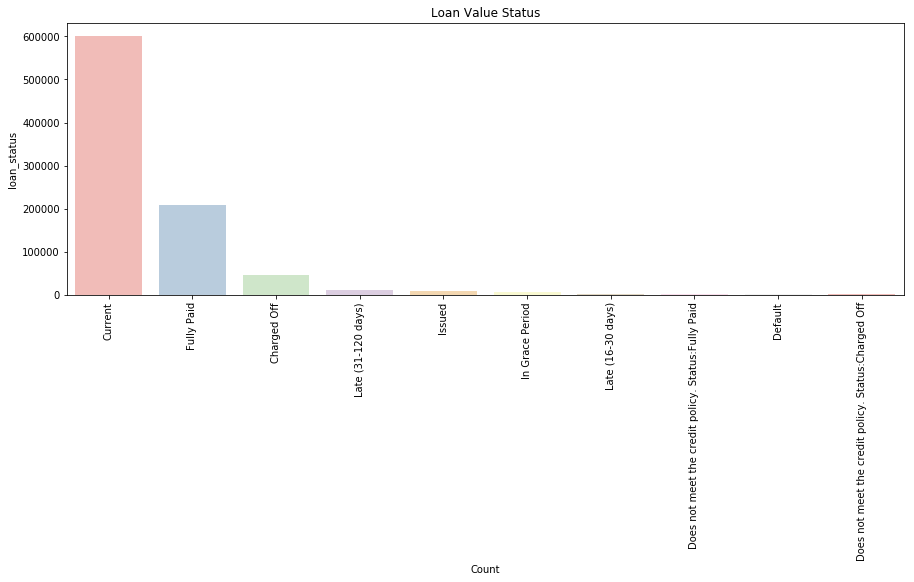

In [122]:
plt.figure(figsize=(15,5))
loan_status=df['loan_status'].value_counts()
sns.barplot(loan_status.index,loan_status,palette='Pastel1')
plt.xlabel('Count')
plt.title("Loan Value Status")
plt.xticks(rotation=90)
loan_status

If you see the diagram, there are lots of loans which have status has "Current".With sizeable loans being "Fully Paid". We can remove the records from "In Grace Period" - "Does not meet the credit policy. Status:Charged Off" since they are not sizeable in number. 

In [123]:
#df['loan_status']=df['loan_status'].value_counts()[:5]

In [124]:
#df.drop(df[(df['loan_status'] == 'Current') & (df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off')].index,inplace=True)df[(df['loan_status'] == 'Current') & (df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off')].index)

df.drop(df[(df['loan_status'] == 'Late (16-30 days)')].index,inplace = True)
df.drop(df[(df['loan_status'] == 'Late (31-120 days)')].index,inplace = True)
df.drop(df[(df['loan_status'] == 'Issued')].index,inplace = True)
df.drop(df[(df['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid')].index,inplace = True)
df.drop(df[(df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off')].index,inplace = True)
df.drop(df[(df['loan_status'] == 'In Grace Period')].index,inplace = True)
df.drop(df[(df['loan_status'] == 'Current')].index,inplace = True)

Fully Paid     207723
Charged Off     45248
Default          1219
Name: loan_status, dtype: int64

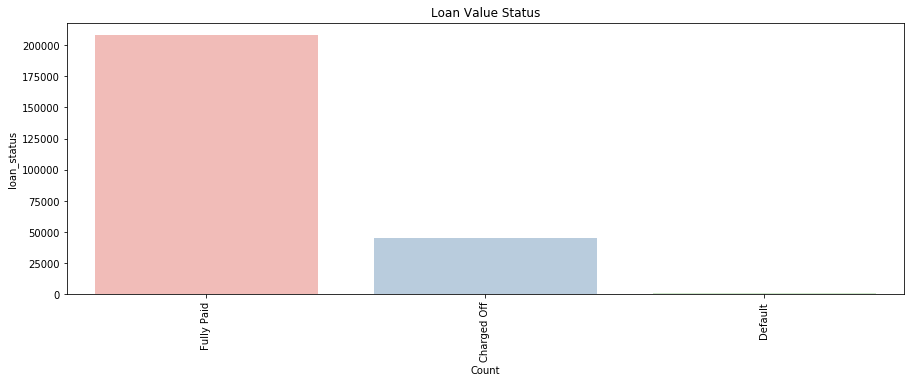

In [125]:
plt.figure(figsize=(15,5))
loan_status=df['loan_status'].value_counts()
sns.barplot(loan_status.index,loan_status,palette='Pastel1')
plt.xlabel('Count')
plt.title("Loan Value Status")
plt.xticks(rotation=90)
loan_status

In [126]:
df['loan_status'] = df['loan_status'].replace({'Charged Off':'Default'})
df['loan_status'].value_counts()
df.loan_status=df.loan_status.astype('category').cat.codes

In [127]:
df.shape

(254190, 21)

## dropping the null rows since we have sufficient amount of data and there is no need to fill the null values.

In [128]:
df.dropna(axis=0,inplace=True)

In [129]:
df.shape

(105951, 21)

In [130]:
numerical = df.columns[df.dtypes == {'float64','int64'}]
for i in numerical:
    if df[i].min() > 0:
        transformed, lamb = boxcox(df.loc[df[i].notnull(), i])
        if np.abs(1 - lamb) > 0.02:
            df.loc[df[i].notnull(), i] = transformed

## One Hot Encoding

In [131]:
df_string = df.select_dtypes(include ='object') 
#df.drop(columns=df_string, axis=1, inplace=True )
#df.drop(df_numerical,inplace=true )
df_string.dtypes

grade             object
home_ownership    object
dtype: object

In [132]:
dummy_grade=pd.get_dummies(df["grade"], prefix="grade")
dummy_ownership=pd.get_dummies(df["home_ownership"], prefix="ownership")
df=df.join(dummy_grade.ix[:,:])
df=df.join(dummy_ownership.ix[:,:])
df.drop(columns={'grade','home_ownership'},inplace=True )
#dummy_ownership.value_counts()

C:\Users\sarita.machado\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sarita.machado\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


### Creating Dummy Variables using One Hot Encoding

In [133]:
X = df.ix[:, df.columns != "loan_status"]
y = df["loan_status"]
print(X.shape, y.shape)
# (2137073, 81) (2137073,)
X = pd.get_dummies(X, drop_first=True)
#print(X.shape)
X_dup = X.copy()

C:\Users\sarita.machado\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


(105951, 31) (105951,)


# Building models using all features

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler
X_dup.columns

Index(['term', 'loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'open_acc',
       'pub_rec', 'delinq_2yrs', 'dti', 'inq_last_6mths', 'revol_bal',
       'revol_util', 'total_pymnt', 'total_rec_late_fee', 'recoveries',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'ownership_ANY',
       'ownership_MORTGAGE', 'ownership_NONE', 'ownership_OTHER',
       'ownership_OWN', 'ownership_RENT'],
      dtype='object')

Splitting the data using scikitlearn's train_test_split and using 70% data for training and 30% for testing.



In [135]:

robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=123, stratify=y)


#####We'll now scale the data so that each column has a mean of zero and unit standard deviation. Xunb (unbalanced set) and yunb are the independent and target variable.

In [136]:
#sc = StandardScaler()
#numerical = X_train.columns[(X_train.dtypes == 'float64') | (X_train.dtypes == 'int64')].tolist()
#X_train[numerical] = sc.fit_transform(X_train[numerical])

In [137]:
Y_train.shape
X_test.shape

print("X_train is {} ,X_test is {} ,Y_train is {} ,Y_test is {} ".format(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape))
#print("City {} is in the country {}".format(X_train.shape, X_train.shape))

X_train is (74165, 31) ,X_test is (31786, 31) ,Y_train is (74165,) ,Y_test is (31786,) 


Now creating the test set for the analysis and scaling it.

In [138]:
def CMatrix(cm):
    fig, axes = plt.subplots(figsize=(8,6))
    cm = cm.astype('float')/cm.sum(axis=0)
    ax = sns.heatmap(cm, annot=True, cmap='Blues');
    ax.set_xlabel('True Label')
    ax.set_ylabel('Predicted Label')
    ax.axis('equal')

## A. Logistic Regression

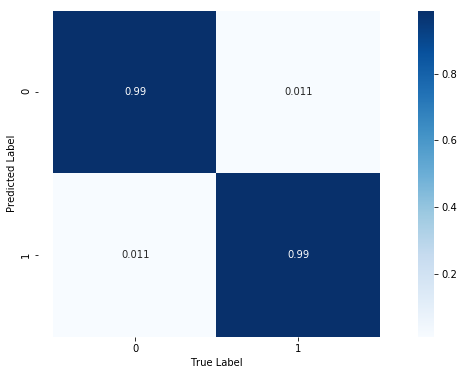

In [139]:
logistic_regression = LogisticRegression(C=1)
logistic_regression.fit(X_train, Y_train)
Y_pred_test = logistic_regression.predict(X_test)
CM = confusion_matrix(y_pred=Y_pred_test, y_true=Y_test)
CMatrix(CM)

## B. Classification Trees

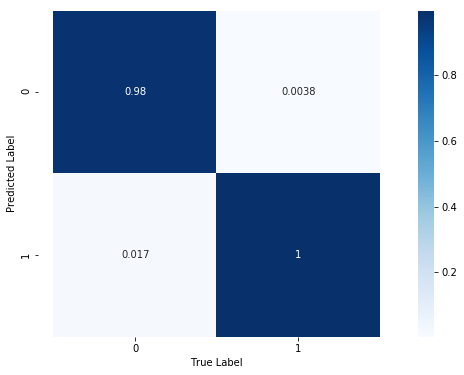

In [140]:
from sklearn.tree import DecisionTreeClassifier
class_tree = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=10)
class_tree.fit(X_train, Y_train)
Y_pred_test = class_tree.predict(X_test)
CM = confusion_matrix(y_pred=Y_pred_test, y_true=Y_test)
CMatrix(CM)

## C. Naive Bayes Classifier

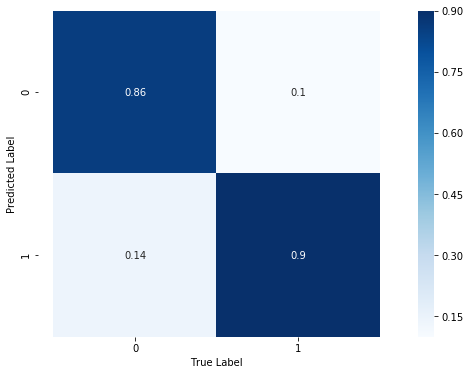

In [141]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(X_train, Y_train)
Y_pred_test = NBC.predict(X_test)
CM = confusion_matrix(y_pred=Y_pred_test, y_true=Y_test)
CMatrix(CM)

## D. RandomForestClassifier

In [142]:
X_dup.columns

Index(['term', 'loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'open_acc',
       'pub_rec', 'delinq_2yrs', 'dti', 'inq_last_6mths', 'revol_bal',
       'revol_util', 'total_pymnt', 'total_rec_late_fee', 'recoveries',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'ownership_ANY',
       'ownership_MORTGAGE', 'ownership_NONE', 'ownership_OTHER',
       'ownership_OWN', 'ownership_RENT'],
      dtype='object')

Accuracy: 0.8951425155728937


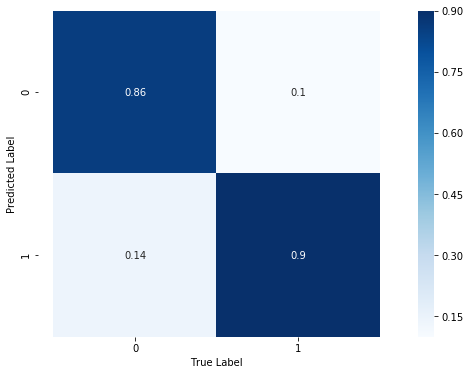

In [143]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
#clf.feature_importances_
list(df.columns)
feature_imp = pd.Series(clf.feature_importances_,index=X_dup.columns).sort_values(ascending=False)
feature_imp
CM = confusion_matrix(y_pred=Y_pred_test, y_true=Y_test)
CMatrix(CM)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred=Y_pred_test))

Based on the above importance, I can again drop the columns which contribute less than 1 % 

In [144]:
#X.drop(columns={'emp_length','inq_last_6mths','tot_coll_amt','delinq_2yrs','grade_A','grade_B','grade_E','pub_rec','ownership_RENT','ownership_MORTGAGE','grade_F','grade_C','grade_D','ownership_OWN','grade_G','acc_now_delinq','ownership_NONE','ownership_OTHER','ownership_ANY'},inplace = True)

In [145]:

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9836720568803876


Computing the ROC curves for the models and finding the true positive and false positive

In [146]:
models = {'NB': GaussianNB(),
          'DT': DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=10),
          'LR': LogisticRegression(C=1),
        'RF': RandomForestClassifier(n_estimators=100)}
unbalset = {}
for i in models.keys():
    scores = cross_val_score(models[i], X_train - np.min(X_train) + 1,
                                    Y_train, cv=3)
    unbalset[i] = scores
    
print(unbalset)

{'NB': array([0.89960359, 0.89462827, 0.89223737]), 'DT': array([0.99223364, 0.99344713, 0.99332551]), 'LR': array([0.98592347, 0.98648977, 0.98830953]), 'RF': array([0.98179759, 0.98293018, 0.98268678])}


In [147]:
tp_unbalset, fp_unbalset = createROC(models, X_train - np.min(X_train) + 1, Y_train, X_test - np.min(X_test) + 1, Y_test)

NameError: name 'createROC' is not defined

In [ ]:
def createROC(models, X, y, Xte, yte):
    false_p, true_p = [], [] ##false postives and true positives

    for i in models.keys():  ##dict of models
        models[i].fit(X, y)

        fp, tp, threshold = roc_curve(yte, models[i].predict_proba(Xte)[:,1]) ##roc_curve function

        true_p.append(tp)
        false_p.append(fp)
    return true_p, false_p ##returning the true postive and false positive

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
#predict = model.predict(X_train)
ax = pd.DataFrame(unbalset).boxplot(widths=(0.9,0.9,0.9,0.9), grid=False, vert=False, ax=axes[0])
ax.set_ylabel('Classifier')
ax.set_xlabel('Cross-Validation Score')

for i in range(0, len(tp_unbalset)):
    axes[1].plot(fp_unbalset[i], tp_unbalset[i], lw=1)

axes[1].plot([0, 1], [0, 1], '--k', lw=1)
axes[1].legend(models.keys())
axes[1].set_ylabel('True Positive Rate')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,1)

cm = confusion_matrix(y_pred=Y_pred_test, y_true=Y_test).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues', ax=axes[2]);
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')